In [1]:
%matplotlib inline
import control as co
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Compensador proporcional e integral

In [2]:
wn = 5
zeta = 0.6
kp = 1.3
ki = 0.1

In [3]:
G = co.TransferFunction([wn**2], [1, 2*zeta*wn, 0])

In [4]:
G


    25
---------
s^2 + 6 s

In [5]:
# Compensador
C = co.TransferFunction([kp], [1]) + co.TransferFunction([ki], [1,0])

In [6]:
C


1.3 s + 0.1
-----------
     s

In [7]:
FTMF = C*G / (1 + C*G)

In [8]:
FTMF


        32.5 s^4 + 197.5 s^3 + 15 s^2
--------------------------------------------
s^6 + 12 s^5 + 68.5 s^4 + 197.5 s^3 + 15 s^2

In [9]:
interval = np.linspace(0, 10, 10000)
t, y = co.step_response(FTMF, interval)

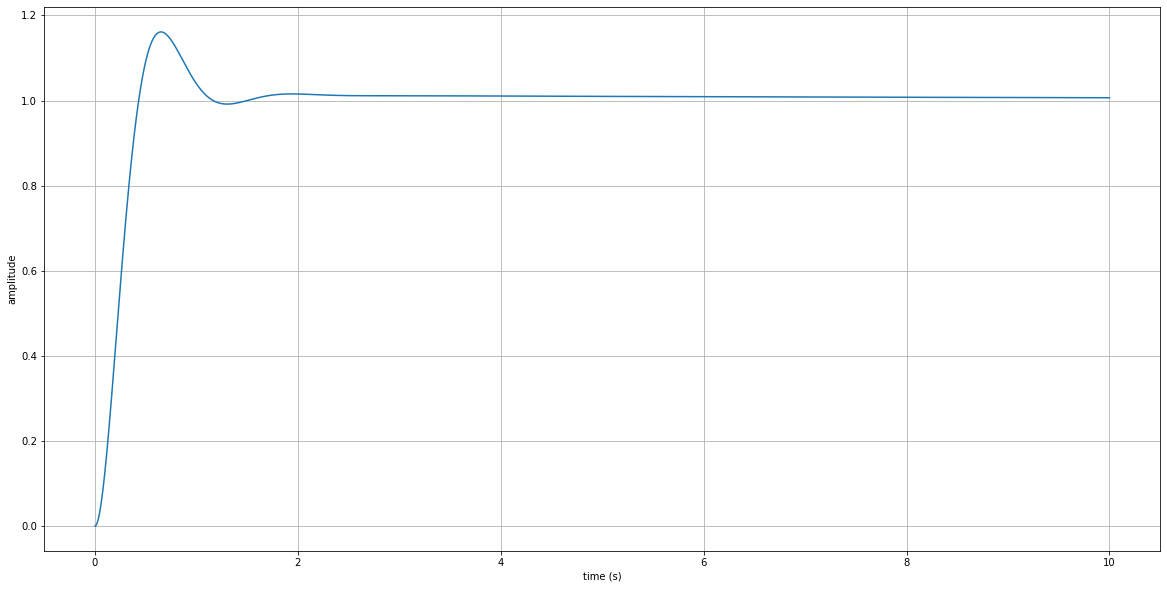

In [10]:
# Resposta ao degrau
plt.plot(t, y)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.grid()

In [11]:
error = 1 - y

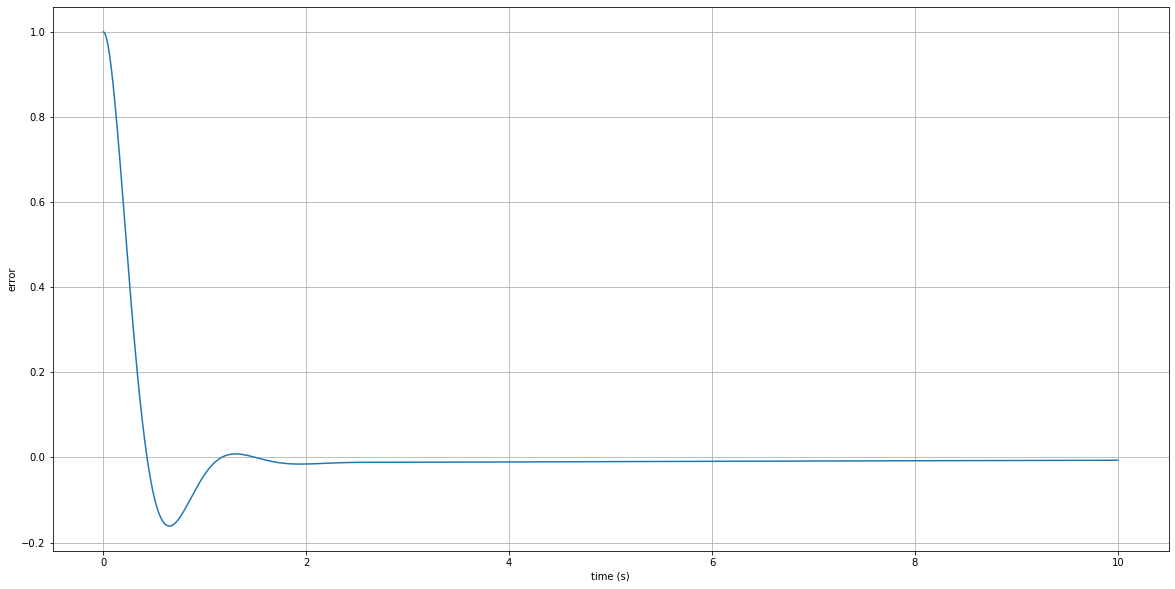

In [12]:
# Erro
plt.plot(t, error)
plt.xlabel("time (s)")
plt.ylabel("error")
plt.grid()